In [1]:
path = "/Users/erika/Documents/Clickbait/myenv/ML"

In [2]:
import numpy as np
import pandas as pd

myfile = "Fisher.txt"
file = pd.read_csv(myfile,  delimiter="\t")

In [3]:
df = pd.DataFrame(file)
df.head()

,Type,PW,PL,SW,SL
0,0,2,14,33,50
1,1,24,56,31,67
2,1,23,51,31,69
3,0,2,10,36,46
4,1,20,52,30,65


In [4]:
def Mean(t):
    test = pd.DataFrame()
    Type = df.loc[df['Type'] == [t]] 
    Mean= Type.mean()
    Max= Type.max()
    Min= Type.min()
    info_pd = test.append(Mean, ignore_index=True)
    info_pd = info_pd.append(Max, ignore_index=True)
    info_pd = info_pd.append(Min, ignore_index=True)
    info_pd.index = ["Mean", "Max", "Min"]
    return info_pd


In [5]:
types = df.Type.unique()
for t in types:
    print (Mean(t))

         PL    PW    SL     SW  Type
Mean  14.62  2.46  50.1  34.28   0.0
Max   19.00  6.00  58.0  44.00   0.0
Min   10.00  1.00  43.0  23.00   0.0
         PL     PW     SL     SW  Type
Mean  55.52  20.06  65.88  29.74   1.0
Max   69.00  25.00  79.00  38.00   1.0
Min   45.00  13.00  49.00  22.00   1.0
         PL     PW     SL     SW  Type
Mean  43.22  13.26  59.36  27.64   2.0
Max   56.00  18.00  70.00  34.00   2.0
Min   30.00  10.00  49.00  20.00   2.0


In [6]:
import matplotlib.pyplot as plt

ax = df.loc[df['Type']== 0].plot.scatter(x='PL', y='SL', color='Blue', label='Setosa');
ay = df.loc[df['Type']== 1].plot.scatter(x='PL', y='SL', color='Pink', label='Virginica', ax = ax);
df.loc[df['Type']== 2].plot.scatter(x='PL', y='SL', color='Yellow', label='Versicolor', ax =ax );
ax.set_xlabel("Petal length", fontsize=12)
ax.set_ylabel("Sepal length ", fontsize=12)

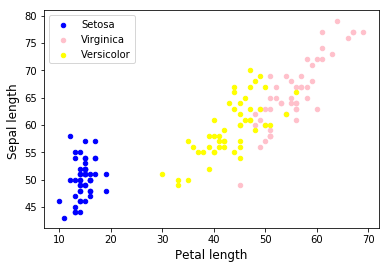

In [7]:
plt.show()

In [8]:
set_vir = df.loc[df['Type']!= 2]
set_vir.head()

,Type,PW,PL,SW,SL
0,0,2,14,33,50
1,1,24,56,31,67
2,1,23,51,31,69
3,0,2,10,36,46
4,1,20,52,30,65


In [9]:
subset = set_vir.loc[:,('Type', 'SL')]
subset.head()

,Type,SL
0,0,50
1,1,67
2,1,69
3,0,46
4,1,65


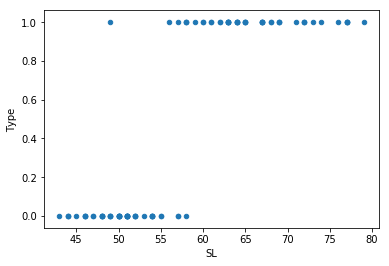

In [10]:
subset.plot.scatter(x='SL', y='Type')
plt.show()

In [11]:
y = subset.loc[:,'Type']
x = subset.loc[:,'SL']

In [12]:
## Put everything in one matrix, with constant column prepended
examples = np.vstack([np.ones_like(x), x, y])
examples = examples.T

print(examples.shape)

(100, 3)


In [13]:
def rss(examples, w):
    """Compute the residual sum of squares for a linear model.
       
       Arguments:
       examples -- (n, p + 1)-matrix of predictors and response
       w        -- p-vector of linear model weights
    """
    x = examples[:,:-1]    ### First p columns: shape = (n, p)
    y = examples.T[-1]     ### Last column: shape = (n,)
    y_pred = w.dot(x.T)
    rss = (y - y_pred)**2
    ### Note: w.dot(x) has shape = (n,)
    return rss.sum()

In [14]:
def lms(examples, eta, iterations, print_every=1000):
    np.random.seed(2)
    rows, columns = examples.shape
    p = columns - 1 ### last column is the response variable
    w = np.random.uniform(low=-1.0, high=1.0, size=p)
    
    for iteration in range(iterations):
        rand = np.random.randint(0, rows)  ### select random index
        x = examples[rand,:-1]   ### Everything but the last column
        c = examples[rand,-1:]   ### The last column
        
        y = w.dot(x)
        error = c - y            ### Error in the single chosen example
        w += (eta * error * x) 
        
        if iteration % print_every == 0:
            print("Iteration: {} RSS: {:.2f}".format(iteration, 
                                                     rss(examples, w)))
    return w

In [15]:
w = lms(examples, eta=0.0004, iterations=210000, print_every=10000)

Iteration: 0 RSS: 64705.87
Iteration: 10000 RSS: 79.68
Iteration: 20000 RSS: 36.15
Iteration: 30000 RSS: 33.50
Iteration: 40000 RSS: 15.20
Iteration: 50000 RSS: 41.55
Iteration: 60000 RSS: 27.49
Iteration: 70000 RSS: 38.55
Iteration: 80000 RSS: 46.75
Iteration: 90000 RSS: 18.89
Iteration: 100000 RSS: 9.02
Iteration: 110000 RSS: 13.08
Iteration: 120000 RSS: 98.16
Iteration: 130000 RSS: 45.08
Iteration: 140000 RSS: 8.23
Iteration: 150000 RSS: 14.89
Iteration: 160000 RSS: 10.38
Iteration: 170000 RSS: 21.41
Iteration: 180000 RSS: 8.02
Iteration: 190000 RSS: 47.35
Iteration: 200000 RSS: 10.55


In [16]:
w

array([-1.86748261,  0.0389549 ])

In [17]:
latitudes = x.T

In [18]:
def predict_temperature(lat):
    return w.dot([1, lat])

line_x = [min(latitudes), max(latitudes)]
line_y = [predict_temperature(v) for v in line_x]

print(line_x, line_y)

[43, 79] [-0.19242188221019307, 1.2099545444819761]


In [19]:
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("January Temperature");
plt.plot(line_x, line_y, 'r');

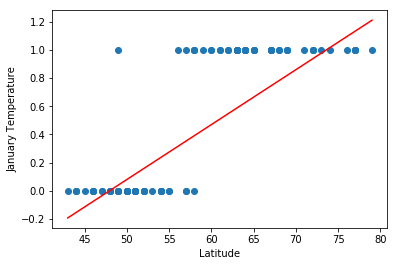

In [20]:
plt.show()